### HomeWork 2
Group: 14
    
Contributors:
- Ramya Madhuri Desineedi
- Abhinav Sharma
- Serena Wu


In [56]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [57]:
#Reading dataset into pandas dataframe
df = pd.read_csv('NYC_Restaurants.csv', dtype=str)

### 1. Create a unique name for each restaurant.

In [58]:
#Concatinating required column values into one string
df['RESTAURANT'] = df['DBA']+' '+df['BUILDING']+' '+df['STREET']+' '+df['ZIPCODE']+' '+df['BORO']
#Getting top 10 values of newly created column
df['RESTAURANT'][:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

### 2. How many restaurants are included in the data?

In [59]:
print("No. of Unique Restaurants:",len(df["RESTAURANT"].unique()))

No. of Unique Restaurants: 10114


### 3. How many chains are there?

In [60]:
#Dropping duplicates at Restaurant level
df_restaurant_dedup = df[["DBA","BORO","RESTAURANT"]].drop_duplicates()
#Getting DBAs that have atleast 2 restaurants (Chains)
mask = df_restaurant_dedup["DBA"].value_counts() >= 2
mask.sum()

368

### 4. Plot a bar graph of the top 20 most popular chains.

<AxesSubplot:>

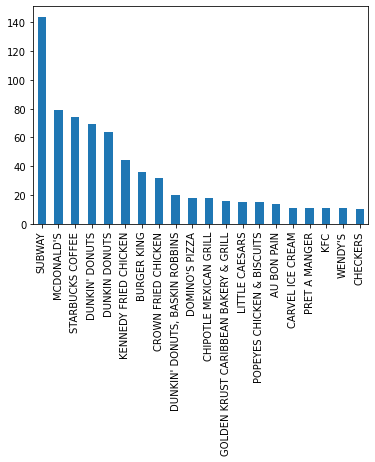

In [61]:
#getting top 20 Chains counts and plotting them after sorting in descending order
df_restaurant_dedup["DBA"].value_counts()[:20].sort_values(ascending=False).plot(kind = 'bar')

### 5. What fraction of all restaurants are chain restaurants?

In [62]:
#Create total occurences at DBA level in the restaurant data
df_restaurant_dedup['Occurences'] = df_restaurant_dedup.groupby("DBA")["DBA"].transform('size')
#Create a flag for Chains (takes value as 1 else 0)
df_restaurant_dedup['Chain_Flag'] = np.where(df_restaurant_dedup.Occurences>=2,1,0)
#fraction of all chain restaurants
round(df_restaurant_dedup['Chain_Flag'].sum()/len(df_restaurant_dedup['DBA']),4)

0.1647

### 6. Plot the number of non-chain restaurants in each boro.

<AxesSubplot:>

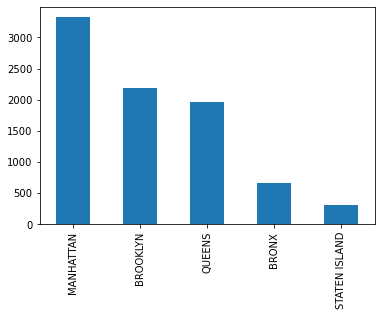

In [63]:
#Create a mask for filtering non-chain restaurants
mask1 = df_restaurant_dedup["Chain_Flag"]==0
#Create a mask for filtering all BOROs whish are not "Missing"
mask2 = df_restaurant_dedup["BORO"]!='Missing'
#plotting count of restaurants for each BORO after sorting in descending order
df_restaurant_dedup[mask1 & mask2]["BORO"].value_counts().sort_values(ascending=False).plot(kind = 'bar')

### 7. Plot the fraction of non-chain restaurants in each boro.

<AxesSubplot:xlabel='BORO'>

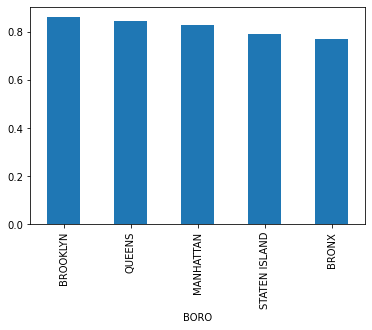

In [64]:
s1 = df_restaurant_dedup[mask1 & mask2][["BORO"]].value_counts().reset_index()
s2 = df_restaurant_dedup[mask2][["BORO"]].value_counts().reset_index()
s1['Ratio'] = s1.iloc[:,1] / s2.iloc[:,1]
s1.set_index('BORO',inplace=True)
s1['Ratio'].sort_values(ascending=False).plot(kind='bar')

### 8. Plot the popularity of cuisines.

<AxesSubplot:>

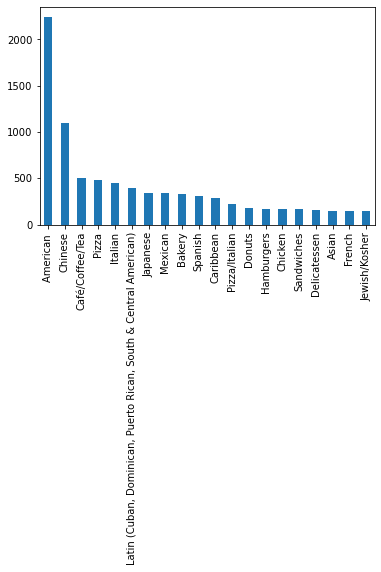

In [65]:
#Dropping duplicates at Restaurant-Cuisine level
df_cuisine= df[["DBA","BORO","RESTAURANT","CUISINE DESCRIPTION"]].drop_duplicates()
#Getting top 20 Cuisine counts served in different restaurants and plotting them after sorting in descending order
df_cuisine["CUISINE DESCRIPTION"].value_counts()[:20].sort_values(ascending=False).plot(kind = 'bar')

### 9. Plot the cuisines among restaurants which never got cited for violations.

<AxesSubplot:>

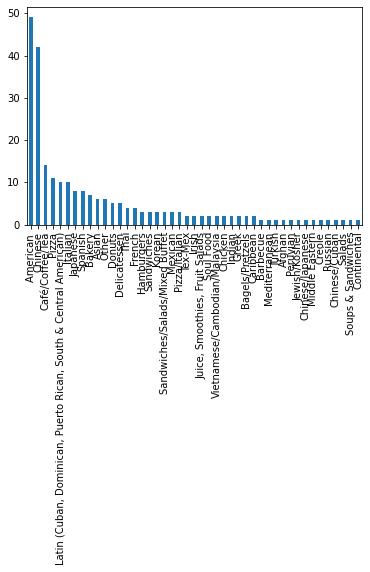

In [66]:
#Getting unique Violation types
df_no_violations = df[df["VIOLATION CODE"].isnull()].drop_duplicates()
#Getting unique Restaurant-Cuisine pairs
df_cuisine_sub = df_no_violations[["RESTAURANT", "CUISINE DESCRIPTION"]].drop_duplicates()
#Getting non-clean restaurants
non_clean_restaurants = df[-df["VIOLATION CODE"].isnull()]["RESTAURANT"].value_counts().index.values
#Getting clean restaurants along with cuisines
df_cuisine_sub_2 = df_cuisine_sub[~df_cuisine_sub['RESTAURANT'].isin(non_clean_restaurants)]
#Plotting cuisines among restaurants which never got cited for violations.
df_cuisine_sub_2["CUISINE DESCRIPTION"].value_counts().plot(kind='bar')

### 10. What cuisines tend to be the “cleanest”?

In [67]:
# count the number of restaurants in each cuisine
cuisine_total = df.drop_duplicates(subset=['RESTAURANT',"CUISINE DESCRIPTION"])["CUISINE DESCRIPTION"].value_counts()

# return the cuisines with over 20 restaurants
def more_than_twenty(cuisine):
    return cuisine_total[cuisine] >= 20

# count the number of restaurants in each cuisine
denominator = df[df["CUISINE DESCRIPTION"].map(more_than_twenty)]['CUISINE DESCRIPTION'].value_counts()

In [68]:
# obtain restaurants that have no violation code
no_violation = df[df['VIOLATION CODE'].isna()].drop_duplicates(subset=['RESTAURANT','CUISINE DESCRIPTION'])

# count the number of restaurants in each cuisine
numerator = no_violation['CUISINE DESCRIPTION'].value_counts()

<AxesSubplot:>

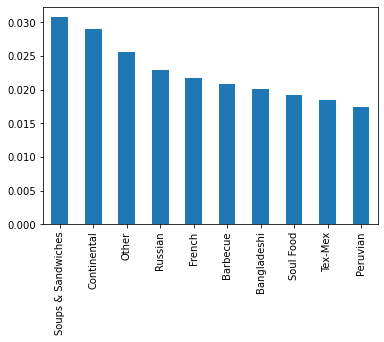

In [69]:
# calculate fraction
(numerator/denominator).sort_values(ascending=False)[:10].plot(kind="bar")

### 11. What are the most common violations in each borough?

In [70]:
#Violations for Non-Missing BOROs
violations = pd.crosstab(df['VIOLATION DESCRIPTION'], df[df['BORO']!='Missing']['BORO'])
violations.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

### 12. What are the most common violations per borough, after normalizing for the relative abundance of each violation?

In [71]:
violationFrequency = df['VIOLATION DESCRIPTION'].value_counts().reset_index()
violationFrequency.set_index('index', inplace=True)
normalize = violationFrequency.merge(violations, left_index=True, right_index=True)
normalize.head()

,VIOLATION DESCRIPTION,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",6056,500,1485,2417,1416,230
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.,4821,452,1242,1890,1107,128
Evidence of mice or live mice present in facility's food and/or non-food areas.,3358,313,937,1228,776,103
Cold food item held above 41º F (smoked fish and reduced oxygen packaged foods above 38 ºF) except during necessary preparation.,2775,168,635,1232,621,118
"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",2718,156,615,1203,619,119


In [72]:
columns_to_divide = df_restaurant_dedup[df_restaurant_dedup["BORO"]!='Missing'].BORO.drop_duplicates().to_list()
for count,value in enumerate(columns_to_divide):
    normalize[value] = normalize[value] / normalize['VIOLATION DESCRIPTION']
normalize.drop(columns='VIOLATION DESCRIPTION').idxmax()

BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Potable water supply inadequate. Water or ice ...
QUEENS           Harmful, noxious gas or vapor detected. CO ~1 ...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

### 13. How many phone area codes correspond to a single zipcode?

In [73]:
def get_first_three(x):
    # get first three characters of phone number if input is phone number
    return x[0:3]
        
phone = df.drop_duplicates(subset = ["RESTAURANT"])['PHONE'].map(get_first_three).reset_index()

In [74]:
# merge phone and zip code into a dataframe
zip_phone = df.drop_duplicates(subset = ["RESTAURANT"])['ZIPCODE'].reset_index().merge(phone)

In [75]:
# drop duplicated "zip code and phone number" pairs, then count the phones that only match one zipcode
results_mask = zip_phone.drop_duplicates(subset=['ZIPCODE','PHONE'])['PHONE'].value_counts() == 1
results_mask.sum()

34

### 14. Find common misspellings of street names.

#### Create a new column, called STREET TYPE, which is the the last wordin the name of the street. For example, if the street is “Astoria Boulevard”, the street type should be “Boulevard”

In [87]:
df['STREET TYPE'] = [val[-1] for val in df['STREET'].str.split(' ')]
df['STREET BASE'] = [val[:-1] for val in df['STREET'].str.split(' ')]
df['STREET TYPE'].head()

0    AVENUE
1    AVENUE
2    AVENUE
3    AVENUE
4    AVENUE
Name: STREET TYPE, dtype: object

#### Create another column, called STREET BASE, which contains everythingbut the last word in the name of the street. For example, if the street is “Astoria Boulevard”, the street base should be “Astoria”.

In [88]:
df['STREET BASE'] = df['STREET BASE'].str.join(" ")
df['STREET BASE'].head()

0    FLATBUSH
1    FLATBUSH
2    FLATBUSH
3    FLATBUSH
4    FLATBUSH
Name: STREET BASE, dtype: object

#### Create a third column, called STREET BASE & ZIP, that combines the street base and the zipcode.

In [89]:
df['STREET BASE & ZIP'] = df['STREET BASE'] +" "+ df['ZIPCODE']
df['STREET BASE & ZIP'].head()

0    FLATBUSH 11225
1    FLATBUSH 11225
2    FLATBUSH 11225
3    FLATBUSH 11225
4    FLATBUSH 11225
Name: STREET BASE & ZIP, dtype: object

#### Create a table containing just these three columns, and remove any duplicates or instances where street base is empty. This table now contains unique street names, along with the street type.

In [91]:
df_streets = df[['STREET TYPE','STREET BASE','STREET BASE & ZIP']].drop_duplicates()
df_streets.isnull().sum()

STREET TYPE          0
STREET BASE          0
STREET BASE & ZIP    0
dtype: int64

In [92]:
df_streets = df_streets.dropna(how="any").drop_duplicates()
df_streets[:10]

,STREET TYPE,STREET BASE,STREET BASE & ZIP
0,AVENUE,FLATBUSH,FLATBUSH 11225
5,ROAD,63,63 11374
9,BOULEVARD,ASTORIA,ASTORIA 11369
16,AVENUE,SUTTER,SUTTER 11208
22,HIGHWAY,KINGS,KINGS 11223
24,AVENUE,CHURCH,CHURCH 11218
26,AVENUE,3,3 11209
30,STREET,EAST 74,EAST 74 10021
31,WEST,PROSPECT PARK,PROSPECT PARK 11215
34,BROADWAY,,10003


#### Merge this table with itself, on the STREET BASE & ZIP column. Thus,in the new merged tabled, we will have two STREET TYPE fields for each street base and zipcode. 

In [93]:
merged_street = df_streets.merge(df_streets,on = "STREET BASE & ZIP")
merged_street[:3]

,STREET TYPE_x,STREET BASE_x,STREET BASE & ZIP,STREET TYPE_y,STREET BASE_y
0,AVENUE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
1,ROAD,63,63 11374,ROAD,63
2,ROAD,63,63 11374,DRIVE,63


#### From the merged table, select only the rows where the street types are different

In [96]:
diff_street_type = merged_street[merged_street['STREET TYPE_x']!=merged_street['STREET TYPE_y']]
diff_street_type.head()

,STREET TYPE_x,STREET BASE_x,STREET BASE & ZIP,STREET TYPE_y,STREET BASE_y
2,ROAD,63,63 11374,DRIVE,63
3,DRIVE,63,63 11374,ROAD,63
9,AVENUE,CHURCH,CHURCH 11218,AVE,CHURCH
10,AVE,CHURCH,CHURCH 11218,AVENUE,CHURCH
15,WEST,PROSPECT PARK,PROSPECT PARK 11215,W,PROSPECT PARK


#### Now, do a cross-tabulation of the two distinct street types (check out the crosstab function in Pandas). This gives us the number of times Ave and Avenue were used with the same STREET BASE & ZIP.

In [95]:
diff_street_type2 = pd.crosstab(diff_street_type['STREET TYPE_x'],diff_street_type['STREET TYPE_y'])
diff_street_type2.head()

STREET TYPE_y,A,AAVENUE,AIRPORT,AVE,AVENUE,B,BLVD,BOULEARD,BOULEVARD,BOWERY,...,STREET,TERM8-A1,TERMINAL,TPKE,TURNPIKE,U,V,W,WEST,X
STREET TYPE_x,,,,,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAVENUE,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIRPORT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVE,0,1,0,0,152,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVENUE,0,1,0,152,0,0,0,0,0,0,...,11,0,0,0,0,0,0,0,0,0


#### From this cross-tabulation table, find the most commonly street type that occurs with each of the following: AVE, ST, RD, PL, BOULEARD, and BULEVARD.

In [86]:
diff_street_type2[['AVE','ST','RD','PL','BOULEARD','BULEVARD']].idxmax()

STREET TYPE_y
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object